In [ ]:
import cv2
from matplotlib import pyplot as plt

### 机器学习手写数字集

In [ ]:
from sklearn import datasets

In [ ]:
D = datasets.load_digits()

In [ ]:
X = D.data
Y = D.target

### Tensorflow手写数字集

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
plt.imshow(x_train[3],'gray')
plt.axis('off')
print(y_train[3])

In [ ]:

import matplotlib.pyplot as plt
 

fig, axes = plt.subplots(10, 10,figsize=(10,10))
for index,ax in enumerate(axes.flat):
    ax.imshow(x_train[index],'gray')
    ax.axis('off')
    ax.text(0,-1,y_train[index],c="green")

plt.show()

### 归一化

In [ ]:
x_train_nor = x_train/255.*2-1

In [ ]:
x_train_nor.min()

In [ ]:
x_train_nor.max()

### 波斯顿房价数据集

In [ ]:
(B_x_train,B_y_train),(B_x_test,B_y_test) = datasets.boston_housing.load_data()

In [ ]:
B_x_train.shape

### cifar100

In [ ]:
(C_x_train,C_y_train),(C_x_test,C_y_test) = datasets.cifar100.load_data()

In [ ]:
datasets.cifar100

In [ ]:
C_x_train.shape

In [ ]:
fig, axes = plt.subplots(10, 10,figsize=(10,10))
for index,ax in enumerate(axes.flat):
    ax.imshow(C_x_train[index])
    ax.axis('off')
    ax.text(0,-1,C_y_train[index])


plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets

#### 数据载入，归一化

In [17]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

#### 搭建网络结构

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),#扁平化 相当于reshape(num,-1)
    tf.keras.layers.Dense(200,activation="relu"),#relu,sigmoid
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')#输出层,节点数=类别数，激活函数用softmax 概率总和为1
])

#### 定义训练超参数

In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

#### 模型保存位置

In [20]:
checkpoint_path = './checkpoint/mnist.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True)

#### 模型训练

In [21]:
history = model.fit(x_train,y_train,epochs=10,
                    validation_data=(x_test,y_test),#validation_data验证数据集
                    validation_freq=1,#validation_freq每轮验证数量
                   callbacks=[cp_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6694 - accuracy: 0.8131 - val_loss: 0.2882 - val_accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2614 - accuracy: 0.9244 - val_loss: 0.2123 - val_accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2035 - accuracy: 0.9414 - val_loss: 0.1749 - val_accuracy: 0.9475
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1674 - accuracy: 0.9517 - val_loss: 0.1614 - val_accuracy: 0.9519
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1429 - accuracy: 0.9580 - val_loss: 0.1355 - val_accuracy: 0.9587
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - accuracy: 0.9645 - val_loss: 0.1342 - val_accuracy: 0.9607
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1098 - accuracy: 0.9684 - val_loss: 0.1152 - val_accuracy:

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               157000    
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.predict(x_test[0].reshape(-1,28,28))

array([[3.1877325e-06, 3.1279831e-07, 9.5213909e-05, 8.3521946e-04,
        2.2145032e-08, 5.8827345e-06, 2.8620900e-10, 9.9898928e-01,
        1.3002053e-06, 6.9545225e-05]], dtype=float32)

#### 可视化

In [24]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

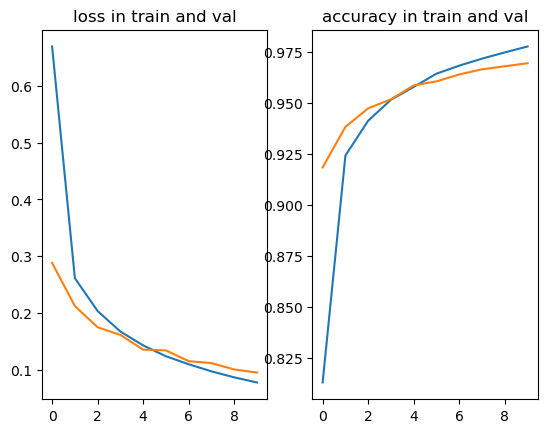

In [25]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.title("loss in train and val")

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("accuracy in train and val")

plt.show()

In [26]:
#数据集做测试的搭配测试集的正确率，即进行模型评估
import tensorflow as tf

#评价
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_loss,test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0952 - accuracy: 0.9696
0.0951753705739975 0.9696000218391418


#### 模型调用测试

In [27]:
#单张图片预测
import tensorflow as tf
from PIL import Image
import numpy as np

img = Image.open('./1.png')
#转灰度图
img = img.resize((28,28)).convert('L')
#调整大小
img_array = np.array(img)
img_array = (255 - img_array)/255
img_array = img_array.reshape(-1,28,28)


#网络结构层
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),#扁平化 相当于reshape(num,-1)
    tf.keras.layers.Dense(200,activation="relu"),#relu,sigmoid
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')#输出层,节点数=类别数，激活函数用softmax 概率总和为1
])
#权重保存路径
checkpoint_path = './checkpoint/mnist.ckpt'
#读取权重文件
model.load_weights(checkpoint_path)


result = model.predict(img_array)
print(result)
pre = np.argmax(result)
pre

[[3.8285640e-01 9.3636032e-08 6.3568662e-04 1.7901803e-07 3.8091614e-05
  2.8364604e-02 1.3779604e-01 3.5529337e-07 4.5029566e-01 1.2871469e-05]]


8

## 鸢尾花数据集的训练

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [2]:
R = datasets.load_iris()

In [3]:
X = R.data
Y = R.target

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [5]:
#网络结构层
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),#扁平化 相当于reshape(num,-1)
    tf.keras.layers.Dense(200,activation="relu"),#relu,sigmoid
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(3,activation='softmax')#输出层,节点数=类别数，激活函数用softmax 概率总和为1
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [7]:
checkpoint_path = './checkpoint/iris.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True)

In [8]:
history = model.fit(x_train,y_train,epochs=10,
                    validation_data=(x_test,y_test),#validation_data验证数据集
                    validation_freq=1,#validation_freq每轮验证数量
                   callbacks=[cp_callback])

Epoch 1/10
4/4 [==============================] - 1s 48ms/step - loss: 1.1047 - accuracy: 0.3500 - val_loss: 1.0975 - val_accuracy: 0.2667
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0494 - accuracy: 0.3500 - val_loss: 1.0405 - val_accuracy: 0.2667
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.9992 - accuracy: 0.3500 - val_loss: 0.9915 - val_accuracy: 0.2667
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.9575 - accuracy: 0.4500 - val_loss: 0.9375 - val_accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.9130 - accuracy: 0.6583 - val_loss: 0.8932 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.8780 - accuracy: 0.6583 - val_loss: 0.8559 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.8472 - accuracy: 0.6583 - val_loss: 0.8204 - val_accuracy: 0.7000
Epoch 8/10
4/4 [===========

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 26,303
Trainable params: 26,303
Non-trainable params: 0
_________________________________________________________________


In [10]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

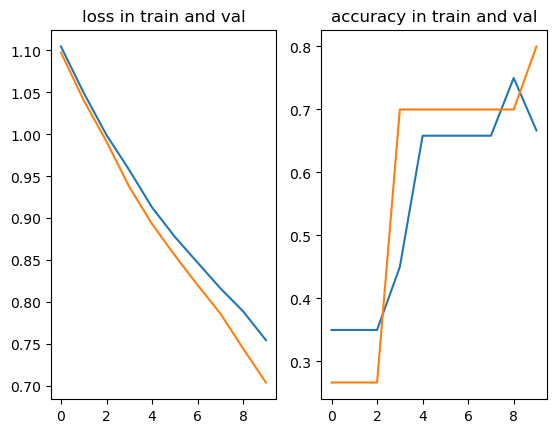

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.title("loss in train and val")

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("accuracy in train and val")

plt.show()

In [12]:
#数据集做测试的搭配测试集的正确率，即进行模型评估
import tensorflow as tf

#评价
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_loss,test_acc)

1/1 [==============================] - 0s 12ms/step - loss: 0.7044 - accuracy: 0.8000
0.7044268846511841 0.800000011920929
